# Practice Project - 5
Titanic Project
Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Note: You can find the dataset in the link below.
Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore")
import joblib

In [2]:
tit_df=pd.read_csv('titanic.csv')
tit_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We can see that there is a total of 891 rows and 12 columns. The survived column is basically our target label that we need to predict the survival accuracy making this a Classification problem!

# Exploartory data analysis
EDA

In [4]:
tit_df.shape

(891, 12)

In [5]:
tit_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Column Names and their data description:

PassengerId - Total number of passengers on the ship labelled starting from 1

Survived - Survival (0 = No; 1 = Yes)

Pclass - Passenger Class (1 = 1st class; 2 = 2nd class; 3 = 3rd class)

Name - Name of the passenger

Sex - Gender of the passenger

Age - Age of the passenger

SibSp - Number of Siblings/Spouses Aboard

Parch - Number of Parents/Children Aboard

Ticket - Ticket Number

Fare - Passenger Fare/Price of the ticket

Cabin - Cabin/Room numbers where the passengers were staying in the ship

Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# By taking a single look at the columns I can confirm that Passenger ID and Name are contributing no inputs since they are just unique values and no insights can be extracted from them so first I will drop them and then check for others one by one.

In [8]:

tit_df = tit_df.drop(["PassengerId", "Name"], axis=1)

In [9]:
tit_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


now we have dropped cloumns name and passenger id as seen from abhive dataset

In [11]:

tit_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Checking the missing value data shows that out of 891 records we have 177 missing in the "Age" column and 687 missing in the "Cabin" column while there are only 2 missing data in "Embarked" column.

As cabin column has the highest number of missing data that is close to 80 percent of the overall data filling them would make no sense and it will simply create a biasness in the machine learning model towards a particular value.
So we will be dropping cabin columns also 

so we will be dropping cabin columns also 

In [12]:
tit_df=tit_df.drop('Cabin',axis=1)

In [13]:
tit_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [14]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB



With the above information we see a variation in the data types for our columns present in the given dataset. There are 2 columns filled with float values, 4 columns have integer values and the remaining 3 columns have object data type. Since object data type cannot be used to build a machine learning model we will need to check if they have any inputs to provide and encode them for usage purpose.

# CHECKING SKEWNESS

In [15]:
tit_df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

using the skew method we can see if there is any skewness in our dataset indicating any kind of outliers. Whether those outliers are genuine or will need to be treated before creating our machine learning model.

The acceptable range for skewness is +/-0.5. We can see that columns 'Survived' and 'Age' are the only one's within that range and for the rest of the columns will need to check for further information on them.

# Visulatization

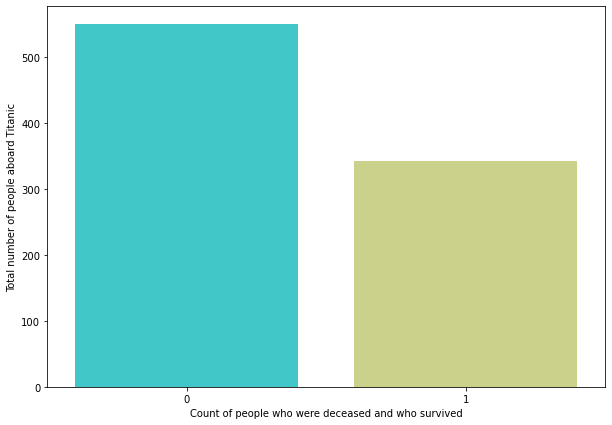

In [16]:

plt.figure(figsize=(10,7))
sns.countplot(x ='Survived', data = tit_df, palette="rainbow")
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()


In the above count plot 0 depicts the number of people who drowned when the Titanic sank and 1 depicts the people who survived the sinking. We can see that more number of people drowned when the Titanic was sinking and one's who survived represent a lesser number in comparison.

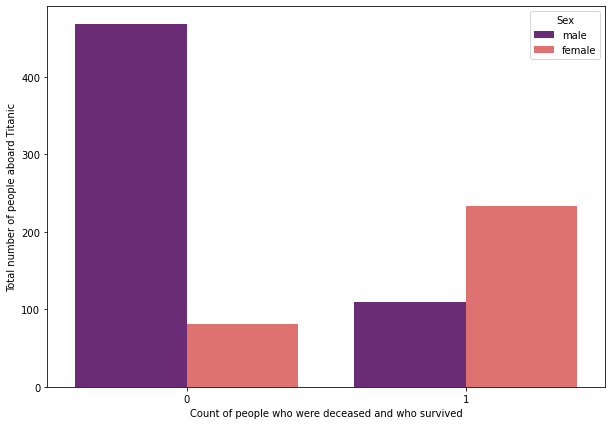

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(x ='Survived', data = tit_df, hue='Sex' , palette="magma")
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()


Adding the sex column shows us a representation on how more men died when compared to women since in Titanic the rescue operations prioritized the life boat usage for women and children.

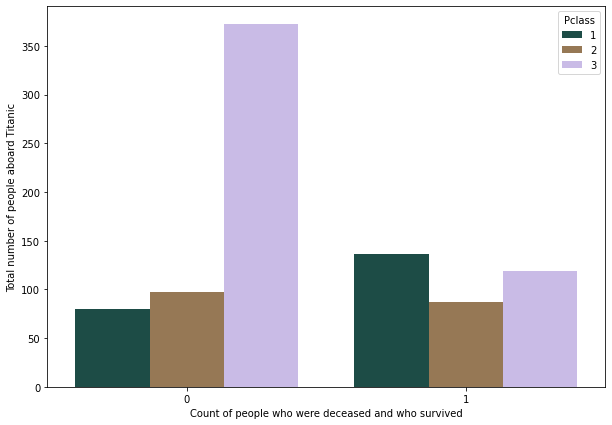

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(x ='Survived', data = tit_df, hue='Pclass', palette="cubehelix")
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

Just like the Sex column when I tried checking for a visual representation over the passenger class factor I see that the highest number of deaths happened for class 3 people because again the rescue team gave priority based on class and passengers from class 1 were rescued first then class 2 and by the time class 3 folks were being rescued they ran out of life boats and time as well since the Titanic had almost sank into the ocean.

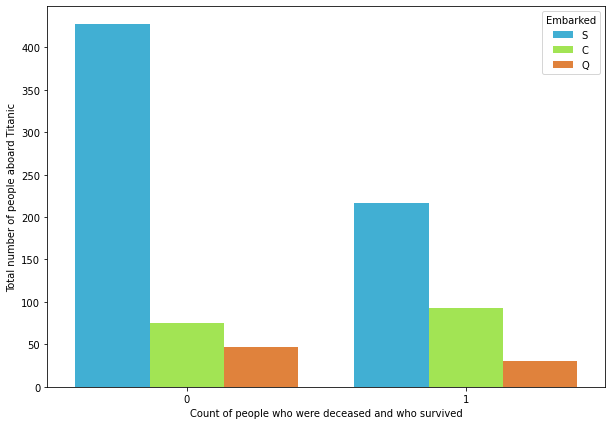

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(x ='Survived', data = tit_df, hue='Embarked', palette="turbo")
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

# PAIR PLOT

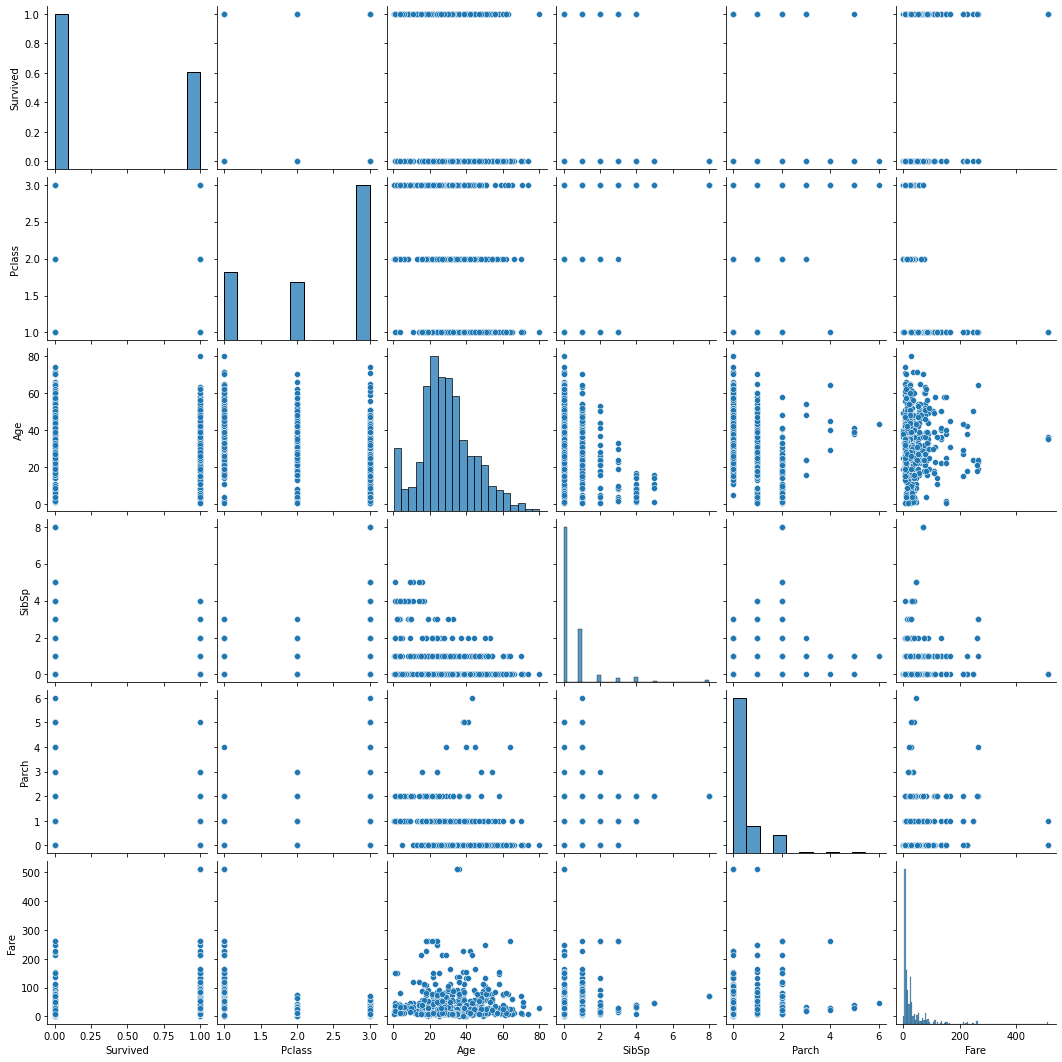

In [24]:
sns.pairplot(tit_df)
plt.show()

The pairplot gives us a visualization on scatter plot + histogram showing us the outliers as well as the skewness data. Looking at the above picture we can see the presence of both skewness and outliers but we shall check few more visuals to confirm if those need to be treated or not.

In [26]:
tit_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
5,0,3,male,NaN,0,0,330877,8.4583,Q
6,0,1,male,54.0,0,0,17463,51.8625,S
7,0,3,male,2.0,3,1,349909,21.0750,S
8,1,3,female,27.0,0,2,347742,11.1333,S
9,1,2,female,14.0,1,0,237736,30.0708,C


Using the head feature I am looking at the first 20 records of dataset and can observe that again "Ticket" column just shows a list of numbers paired with few alphabets that is basically indicating towards the unique allotment given to the passengers validating them to be eligible the board the Titanic. As it serves no purpose in the prediction of survival rate of the people cruising the Titanic I will remove this column too.

In [28]:
tit_df = tit_df.drop("Ticket", axis=1)

In [29]:
tit_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# violin plot

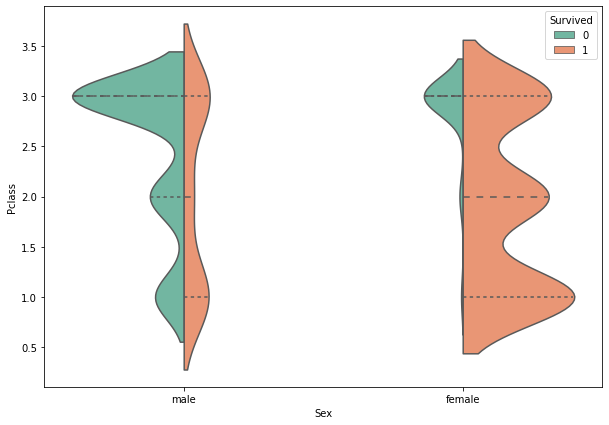

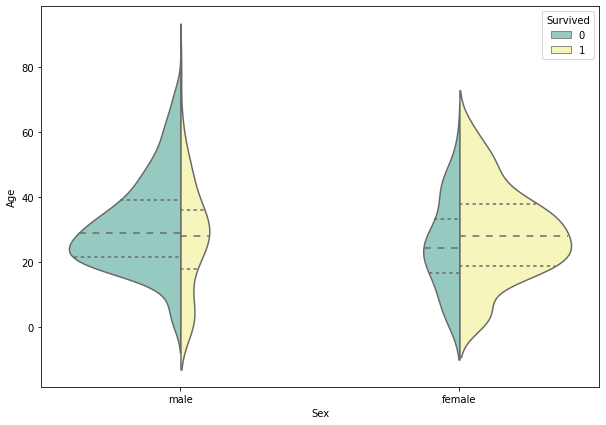

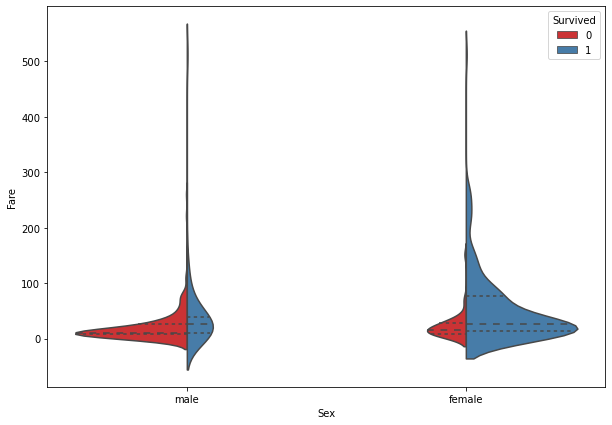

In [35]:

plt.figure(figsize=(10,7))
sns.violinplot(x="Sex", y="Pclass", hue="Survived", data=tit_df, palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

plt.figure(figsize=(10,7))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=tit_df, palette="Set3", split=True, scale="count", inner="quartile")
plt.show()

plt.figure(figsize=(10,7))
sns.violinplot(x="Sex", y="Fare", hue="Survived", data=tit_df, palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

filing the missing value

# BOX PLOAT

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

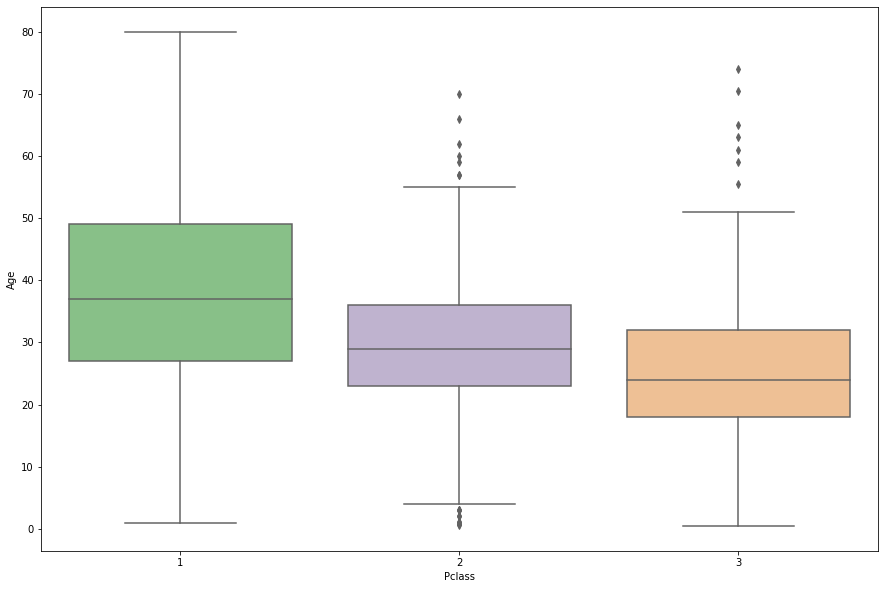

In [40]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass', y='Age', data=tit_df, palette="Accent")

In [37]:
tit_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


Gettig back to the missing values issue we will need to fix it and I have decided on using the mean option for "Age" column and mode for the "Embarked" column.


In [48]:
tit_df["Age"] = tit_df["Age"].fillna(tit_df["Age"].mean())

In [45]:
tit_df["Embarked"] = tit_df["Embarked"].fillna(tit_df["Embarked"].mode()[0])

In [49]:
tit_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [50]:
tit_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [51]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [60]:
tit_df["Age"] = tit_df["Age"] .astype('int64')

In [61]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB



as seen from abhove we have replaced age value with mean and also converted float value to interger using abhove function


# Encoding

In [63]:

tit_df = pd.get_dummies(tit_df)
tit_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,0,1,0,0,1
1,1,1,38,1,0,71.2833,1,0,1,0,0
2,1,3,26,0,0,7.9250,1,0,0,0,1
3,1,1,35,1,0,53.1000,1,0,0,0,1
4,0,3,35,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,0,1,0,0,1
887,1,1,19,0,0,30.0000,1,0,0,0,1
888,0,3,29,1,2,23.4500,1,0,0,0,1
889,1,1,26,0,0,30.0000,0,1,1,0,0


I am using the pandas get_dummies method to encode the categorical object datatype 'Sex' and 'Embarked' columns. Since get_dummies uses the One Hot Encoding mechanism we are able to get extra columns where the rows are converted to indicator variables.

# Distribution plot

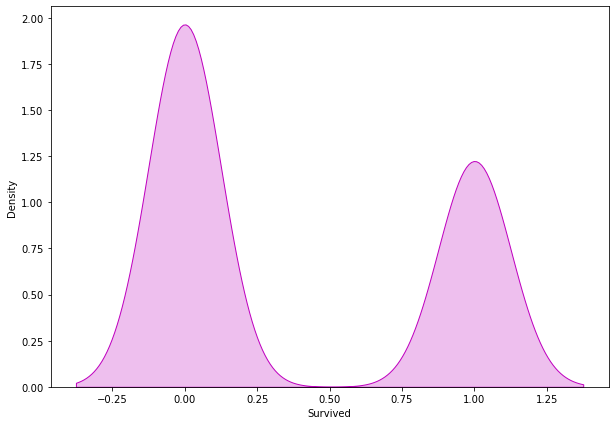

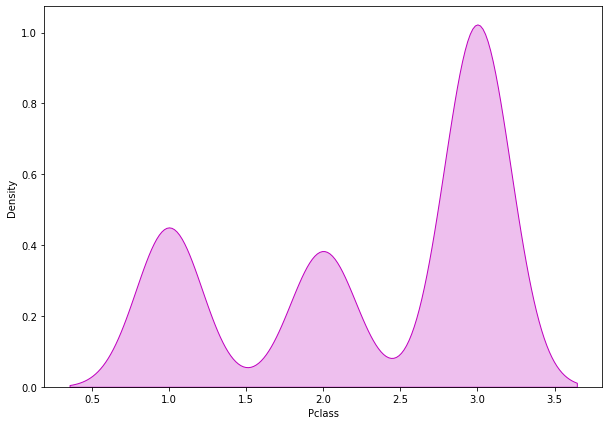

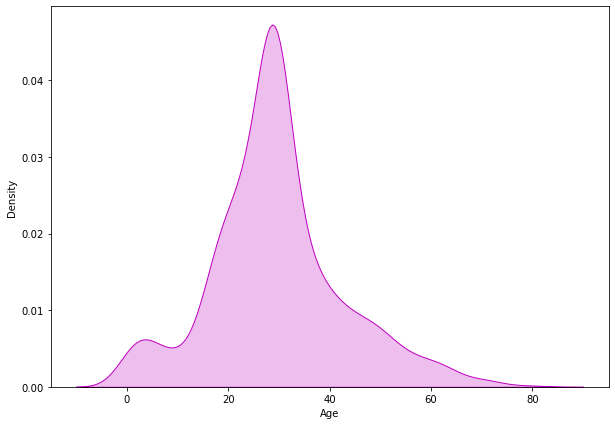

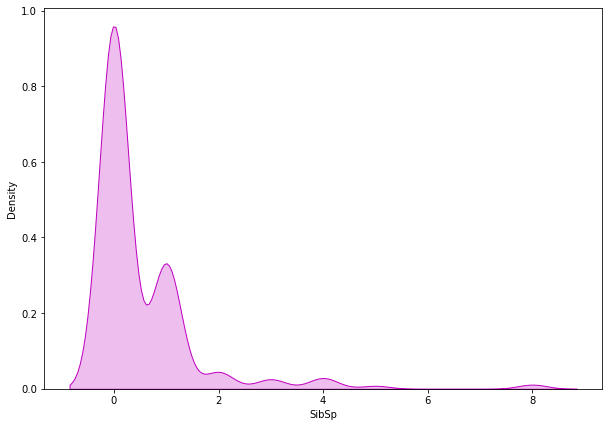

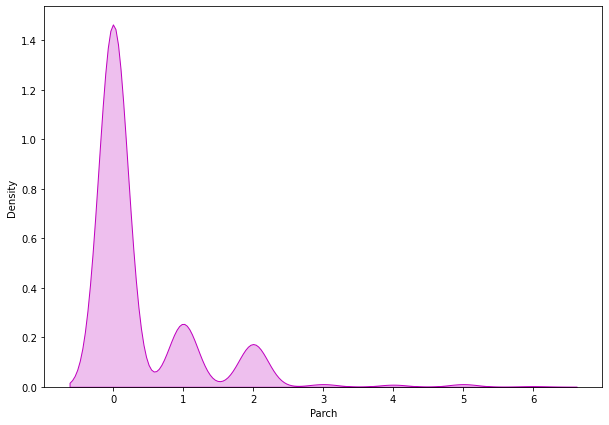

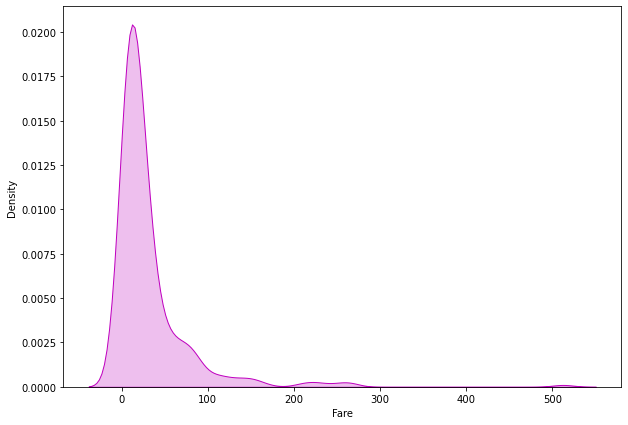

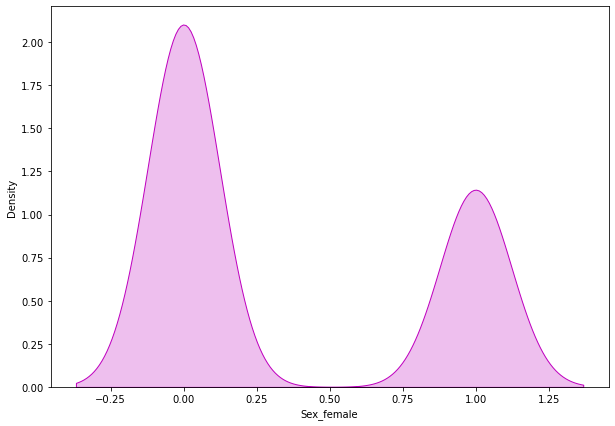

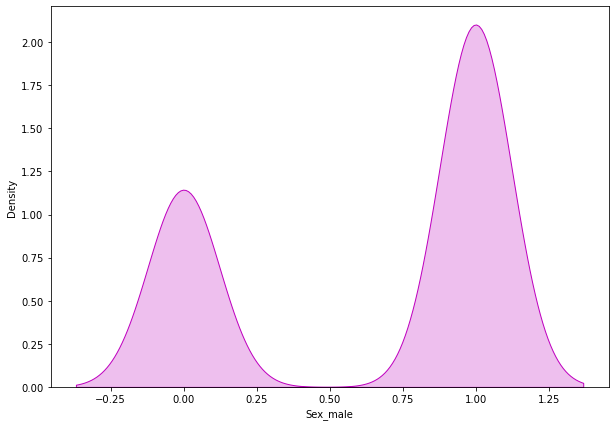

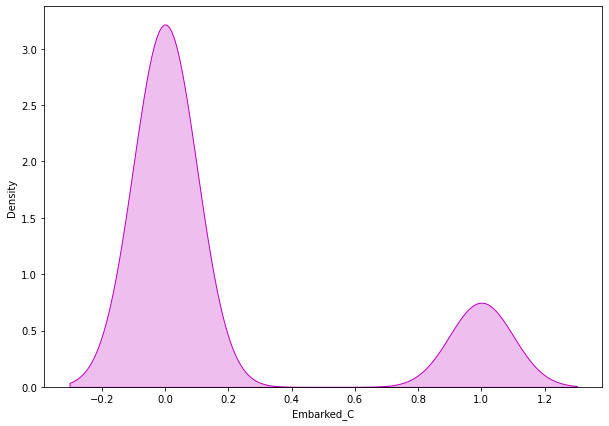

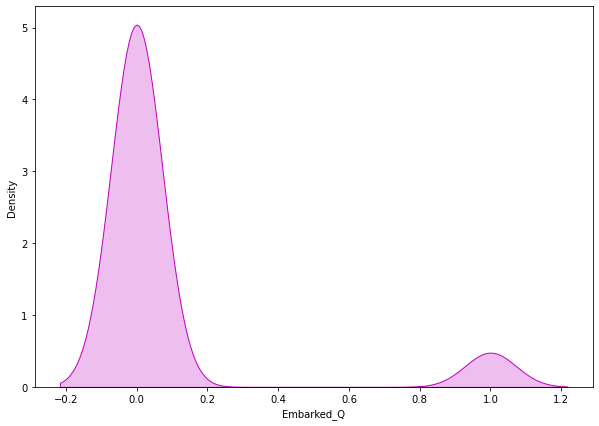

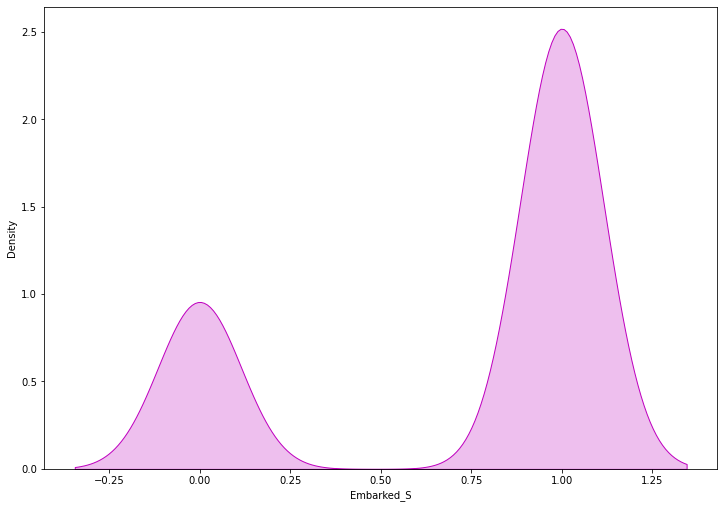

In [65]:
for col, value in tit_df.items():
    plt.figure(figsize=(10,7))
    sns.distplot(value, hist=False, color="m", kde_kws={"shade": True})
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

# Correlation using a Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

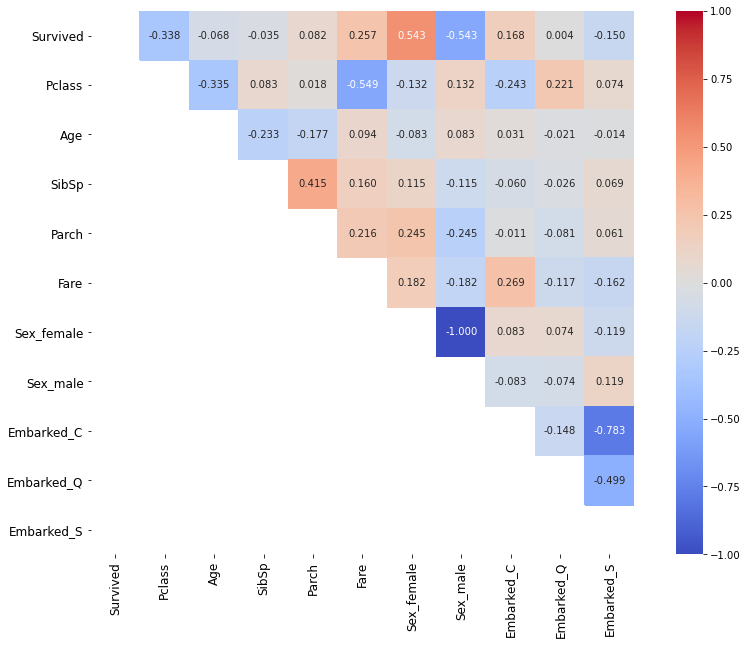

In [70]:
lower_triangle = np.tril(tit_df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(tit_df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="coolwarm", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In the above correlation heatmap we can see that our label has both positive and negative correlation with the other columns present in our dataset.

The female column is a perfect negative correlation to male column since the higher the number of female survivors the lower the number of male survivors

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [71]:

X = tit_df.drop("Survived", axis=1)
Y = tit_df["Survived"]

I have separated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

# Scaling

In [72]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [73]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.580044,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.650112,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.272505,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.419458,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.419458,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.195620,-0.474545,-0.473674,-0.386671,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,-1.566107,-0.810699,-0.474545,-0.473674,-0.044381,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,0.827377,-0.041851,0.432793,2.008933,-0.176263,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,-1.566107,-0.272505,-0.474545,-0.473674,-0.044381,-0.737695,0.737695,2.074505,-0.307562,-1.623803


In [74]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-2.031048e-16,1.203053e-16,3.456519e-16,6.716164e-17,-4.373606e-17,3.162453e-16,-4.059603e-16,1.167541e-16,-4.017238e-16,-2.093350e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-2.271510e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-7.376951e-01,-1.355574e+00,-4.820427e-01,-3.075623e-01,-1.623803e+00
25%,-3.693648e-01,-5.800444e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-7.376951e-01,-1.355574e+00,-4.820427e-01,-3.075623e-01,-1.623803e+00
50%,8.273772e-01,-4.185087e-02,-4.745452e-01,-4.736736e-01,-3.573909e-01,-7.376951e-01,7.376951e-01,-4.820427e-01,-3.075623e-01,6.158384e-01
75%,8.273772e-01,4.194579e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,1.355574e+00,7.376951e-01,-4.820427e-01,-3.075623e-01,6.158384e-01
max,8.273772e-01,3.879274e+00,6.784163e+00,6.974147e+00,9.667167e+00,1.355574e+00,7.376951e-01,2.074505e+00,3.251373e+00,6.158384e-01



Using the describe method I can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our feature data set.

In [75]:
X = X.drop(["SibSp","Parch","Embarked_C","Embarked_Q","Embarked_S"], axis=1)

 I have dropped the SibSp, Parch, Embarked_C, Embarked_Q and Embarked_S columns from the features list to check if that improves the accuracy for our classification models since as per the correlation details we saw it did not have much input for any kind of corresponse with the survival rate.

# Creating the training and testing data sets

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
#I am taking 20 percent of the complete dataset for training purpose and the remaing 80 percent with be used to train the machine learning models

# ML Model Function for Classification and Evaluation Metrics

In [80]:

# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)


I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any classification machine learning model that calls for this function.

In [82]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 78.77094972067039

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Cross Validation Score: 78.67491055175444

Accuracy Score - Cross Validation Score is 0.09603916891595077


In [83]:

# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 81.00558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Cross Validation Score: 79.91400414286612

Accuracy Score - Cross Validation Score is 1.0915824493126536


In [84]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 81.56424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

Cross Validation Score: 79.13439206578369

Accuracy Score - Cross Validation Score is 2.4298537442721795


In [85]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 83.79888268156425

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.84      0.76      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Cross Validation Score: 81.82411650241667

Accuracy Score - Cross Validation Score is 1.9747661791475792


In [86]:

# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 81.00558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       105
           1       0.84      0.66      0.74        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Cross Validation Score: 79.23545289059068

Accuracy Score - Cross Validation Score is 1.7701337015880938


In [87]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 83.24022346368714

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179

Cross Validation Score: 80.13746783001694

Accuracy Score - Cross Validation Score is 3.102755633670199


# Hyper parameter tuning on the best ML Model

In [88]:

# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21, 42, 104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr']
            }

In [89]:
GSCV = GridSearchCV(SVC(), svc_param, cv=4)

In [90]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False]})

In [91]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'poly',
 'probability': True,
 'random_state': 21,
 'shrinking': True}

In [92]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='poly', probability=True, random_state=21,
                 shrinking=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 79.88826815642457



I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

# AUC ROC

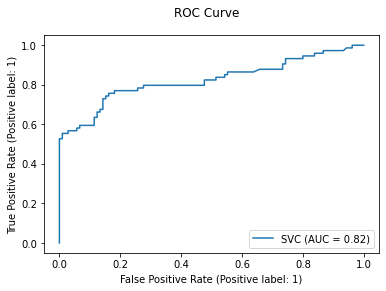

In [93]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

# confusion matrix

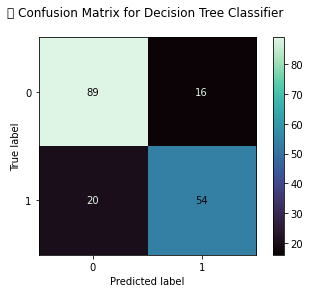

In [95]:
class_names = tit_df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()


With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my model missed to provide the correct prediction (depicting in the black boxes)

In [96]:
filename = "FinalModel_5.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_5.pkl']


Finally I am saving my best classification model using the joblib library.